In [2]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [48]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

100% [..................................................................................] 522 / 522File loaded


In [49]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

In [50]:
# Agregamos ruido
N = len(x)
sigma = np.random.uniform(0,2.,size=N)
sigma

array([0.25967259, 1.72637237, 0.13198999, 0.27523985, 0.71198812,
       0.21164839, 0.18437819, 0.77368484, 0.929895  , 0.18233725,
       0.91325961, 0.39124854, 0.73316204, 0.33380968, 1.66285839,
       0.12460036, 1.78087988, 1.83595239, 0.07860919, 1.69251716])

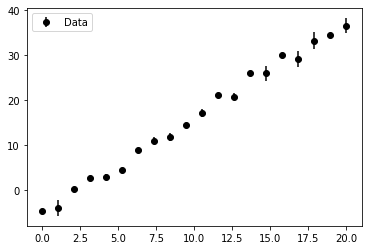

In [51]:
#plt.scatter(x,y)
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.legend(loc=0)

In [52]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [53]:
# Grado polinomial
n = 1
param = GetFit(x,y,n)
param

array([-5.12918553,  2.12503681])

In [54]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [55]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

2.12503680800827*x - 5.12918552885298

In [56]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

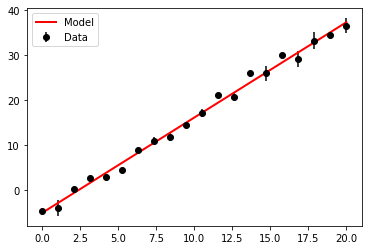

In [57]:
plt.errorbar(x,y,yerr=sigma,fmt='o',color='k',label='Data')
plt.plot(_x,_y,color='r',lw=2,label='Model')
plt.legend()